<a href="https://colab.research.google.com/github/oroobyaseen/oroobyaseen/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation,MaxPooling2D,Dropout
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from tensorflow.keras.models import load_model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,LearningRateScheduler,CSVLogger,LambdaCallback,TensorBoard
from keras import regularizers
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
import seaborn as sns
import math
import os

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
%matplotlib inline

In [18]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'
#test_path  = '/content/drive/MyDrive/New folder (6)/test'
train_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    channel_shift_range=10.,
    fill_mode="nearest"
)
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128)

valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224), 
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128, shuffle=False)
#test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    #classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128,shuffle=False)

Found 2516 images belonging to 3 classes.
Found 616 images belonging to 3 classes.


In [34]:
vgg19_model = VGG16() 
model_vgg19 = Sequential() 
for layer in vgg19_model.layers[:-1]: 
    model_vgg19.add(layer) 
for layer in model_vgg19.layers: 
    layer.trainable = False 
    
model_vgg19.add(Dense(3, activation='softmax'))

553467096/553467096 [==============================] - 6s 0us/step


In [35]:
model_vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:


model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

In [ ]:
model_vgg19.summary()

In [36]:
history = model_vgg19.fit_generator(generator=train_batches,
                                    #steps_per_epoch=len(train_batches),
                                 validation_data=valid_batches, 
                                 #validation_steps=len(valid_batches), 
                                    epochs=50, verbose=1,  callbacks=[model5_es, model5_rlr, model5_mcp])

<ipython-input-36-6c915f99ae88>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg19.fit_generator(generator=train_batches,


Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.4818 - accuracy: 0.6773

20/20 [==============================] - 45s 2s/step - loss: 0.4818 - accuracy: 0.6773 - val_loss: 0.3380 - val_accuracy: 0.7938 - lr: 0.0010
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.3242 - accuracy: 0.7993

20/20 [==============================] - 43s 2s/step - loss: 0.3242 - accuracy: 0.7993 - val_loss: 0.2785 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.2820 - accuracy: 0.8315

20/20 [==============================] - 43s 2s/step - loss: 0.2820 - accuracy: 0.8315 - val_loss: 0.2657 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.8410

20/20 [==============================] - 42s 2s/step - loss: 0.2629 - accuracy: 0.8410 - val_loss: 0.2545 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 5/50
20/20 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.8470

20/20 [==============================] - 42s 2s/step - loss: 0.2557 - accuracy: 0.8470 - val_loss: 0.2329 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 6/50
20/20 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.8510

20/20 [==============================] - 42s 2s/step - loss: 0.2500 - accuracy: 0.8510 - val_loss: 0.2292 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 7/50
20/20 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.8712

20/20 [==============================] - 42s 2s/step - loss: 0.2308 - accuracy: 0.8712 - val_loss: 0.2330 - val_accuracy: 0.8588 - lr: 0.0010
Epoch 8/50
20/20 [==============================] - ETA: 0s - loss: 0.2268 - accuracy: 0.8736

20/20 [==============================] - 42s 2s/step - loss: 0.2268 - accuracy: 0.8736 - val_loss: 0.2289 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 9/50
20/20 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.8669

20/20 [==============================] - 45s 2s/step - loss: 0.2282 - accuracy: 0.8669 - val_loss: 0.2248 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 10/50
20/20 [==============================] - ETA: 0s - loss: 0.2260 - accuracy: 0.8760

20/20 [==============================] - 43s 2s/step - loss: 0.2260 - accuracy: 0.8760 - val_loss: 0.2192 - val_accuracy: 0.8620 - lr: 0.0010
Epoch 11/50
20/20 [==============================] - ETA: 0s - loss: 0.2140 - accuracy: 0.8776

20/20 [==============================] - 43s 2s/step - loss: 0.2140 - accuracy: 0.8776 - val_loss: 0.2186 - val_accuracy: 0.8620 - lr: 0.0010
Epoch 12/50
20/20 [==============================] - ETA: 0s - loss: 0.2113 - accuracy: 0.8752

20/20 [==============================] - 43s 2s/step - loss: 0.2113 - accuracy: 0.8752 - val_loss: 0.2252 - val_accuracy: 0.8718 - lr: 0.0010
Epoch 13/50
20/20 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.8824

20/20 [==============================] - 43s 2s/step - loss: 0.2058 - accuracy: 0.8824 - val_loss: 0.2216 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 14/50
20/20 [==============================] - ETA: 0s - loss: 0.2017 - accuracy: 0.8867

20/20 [==============================] - 43s 2s/step - loss: 0.2017 - accuracy: 0.8867 - val_loss: 0.2140 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 15/50
20/20 [==============================] - ETA: 0s - loss: 0.2053 - accuracy: 0.8824

20/20 [==============================] - 42s 2s/step - loss: 0.2053 - accuracy: 0.8824 - val_loss: 0.2114 - val_accuracy: 0.8847 - lr: 0.0010
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.8883

20/20 [==============================] - 45s 2s/step - loss: 0.2012 - accuracy: 0.8883 - val_loss: 0.2133 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 17/50
20/20 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.8923

20/20 [==============================] - 44s 2s/step - loss: 0.2022 - accuracy: 0.8923 - val_loss: 0.2174 - val_accuracy: 0.8766 - lr: 0.0010
Epoch 18/50
20/20 [==============================] - ETA: 0s - loss: 0.1914 - accuracy: 0.8939

20/20 [==============================] - 42s 2s/step - loss: 0.1914 - accuracy: 0.8939 - val_loss: 0.2058 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 19/50
20/20 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.8919

20/20 [==============================] - 42s 2s/step - loss: 0.1940 - accuracy: 0.8919 - val_loss: 0.2011 - val_accuracy: 0.8847 - lr: 0.0010
Epoch 20/50
20/20 [==============================] - ETA: 0s - loss: 0.1856 - accuracy: 0.8983

20/20 [==============================] - 42s 2s/step - loss: 0.1856 - accuracy: 0.8983 - val_loss: 0.2068 - val_accuracy: 0.8831 - lr: 0.0010
Epoch 21/50
20/20 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.8891

20/20 [==============================] - 42s 2s/step - loss: 0.1862 - accuracy: 0.8891 - val_loss: 0.2011 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 22/50
20/20 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.9014

20/20 [==============================] - 44s 2s/step - loss: 0.1781 - accuracy: 0.9014 - val_loss: 0.2061 - val_accuracy: 0.8766 - lr: 0.0010
Epoch 23/50
20/20 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.8927

20/20 [==============================] - 42s 2s/step - loss: 0.1931 - accuracy: 0.8927 - val_loss: 0.2012 - val_accuracy: 0.8880 - lr: 0.0010
Epoch 24/50
20/20 [==============================] - ETA: 0s - loss: 0.1783 - accuracy: 0.9038

20/20 [==============================] - 42s 2s/step - loss: 0.1783 - accuracy: 0.9038 - val_loss: 0.1986 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 25/50
20/20 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.9026

20/20 [==============================] - 43s 2s/step - loss: 0.1823 - accuracy: 0.9026 - val_loss: 0.2068 - val_accuracy: 0.8847 - lr: 0.0010
Epoch 26/50
20/20 [==============================] - ETA: 0s - loss: 0.1724 - accuracy: 0.9042

20/20 [==============================] - 42s 2s/step - loss: 0.1724 - accuracy: 0.9042 - val_loss: 0.2058 - val_accuracy: 0.8847 - lr: 0.0010
Epoch 27/50
20/20 [==============================] - ETA: 0s - loss: 0.1835 - accuracy: 0.8979

20/20 [==============================] - 44s 2s/step - loss: 0.1835 - accuracy: 0.8979 - val_loss: 0.2077 - val_accuracy: 0.8799 - lr: 0.0010
Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 0.1736 - accuracy: 0.9082

20/20 [==============================] - 42s 2s/step - loss: 0.1736 - accuracy: 0.9082 - val_loss: 0.1847 - val_accuracy: 0.8977 - lr: 0.0010
Epoch 29/50
20/20 [==============================] - ETA: 0s - loss: 0.1712 - accuracy: 0.9050

20/20 [==============================] - 42s 2s/step - loss: 0.1712 - accuracy: 0.9050 - val_loss: 0.1920 - val_accuracy: 0.8929 - lr: 0.0010
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9014

20/20 [==============================] - 42s 2s/step - loss: 0.1778 - accuracy: 0.9014 - val_loss: 0.2109 - val_accuracy: 0.8766 - lr: 0.0010
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.1782 - accuracy: 0.9082

20/20 [==============================] - 42s 2s/step - loss: 0.1782 - accuracy: 0.9082 - val_loss: 0.1991 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 32/50
20/20 [==============================] - ETA: 0s - loss: 0.1701 - accuracy: 0.9026

20/20 [==============================] - 42s 2s/step - loss: 0.1701 - accuracy: 0.9026 - val_loss: 0.1889 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 33/50
20/20 [==============================] - ETA: 0s - loss: 0.1732 - accuracy: 0.8990

20/20 [==============================] - 44s 2s/step - loss: 0.1732 - accuracy: 0.8990 - val_loss: 0.1911 - val_accuracy: 0.8929 - lr: 0.0010
Epoch 34/50
20/20 [==============================] - ETA: 0s - loss: 0.1644 - accuracy: 0.9070
Epoch 34: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


20/20 [==============================] - 42s 2s/step - loss: 0.1644 - accuracy: 0.9070 - val_loss: 0.1981 - val_accuracy: 0.8929 - lr: 0.0010
Epoch 35/50
20/20 [==============================] - ETA: 0s - loss: 0.1636 - accuracy: 0.9042

20/20 [==============================] - 42s 2s/step - loss: 0.1636 - accuracy: 0.9042 - val_loss: 0.1938 - val_accuracy: 0.8896 - lr: 2.0000e-04
Epoch 36/50
20/20 [==============================] - ETA: 0s - loss: 0.1631 - accuracy: 0.9141

20/20 [==============================] - 42s 2s/step - loss: 0.1631 - accuracy: 0.9141 - val_loss: 0.1922 - val_accuracy: 0.8929 - lr: 2.0000e-04
Epoch 37/50
20/20 [==============================] - ETA: 0s - loss: 0.1562 - accuracy: 0.9193

20/20 [==============================] - 42s 2s/step - loss: 0.1562 - accuracy: 0.9193 - val_loss: 0.1918 - val_accuracy: 0.8961 - lr: 2.0000e-04
Epoch 38/50
20/20 [==============================] - ETA: 0s - loss: 0.1624 - accuracy: 0.9098

20/20 [==============================] - 42s 2s/step - loss: 0.1624 - accuracy: 0.9098 - val_loss: 0.1900 - val_accuracy: 0.8977 - lr: 2.0000e-04
Epoch 39/50
20/20 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9122

20/20 [==============================] - 44s 2s/step - loss: 0.1602 - accuracy: 0.9122 - val_loss: 0.1883 - val_accuracy: 0.8977 - lr: 2.0000e-04
Epoch 40/50
20/20 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.9221
Epoch 40: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.


20/20 [==============================] - 42s 2s/step - loss: 0.1529 - accuracy: 0.9221 - val_loss: 0.1889 - val_accuracy: 0.8994 - lr: 2.0000e-04
Epoch 41/50
20/20 [==============================] - ETA: 0s - loss: 0.1472 - accuracy: 0.9257

20/20 [==============================] - 42s 2s/step - loss: 0.1472 - accuracy: 0.9257 - val_loss: 0.1877 - val_accuracy: 0.8945 - lr: 4.0000e-05
Epoch 42/50
20/20 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9153

20/20 [==============================] - 42s 2s/step - loss: 0.1550 - accuracy: 0.9153 - val_loss: 0.1880 - val_accuracy: 0.8961 - lr: 4.0000e-05
Epoch 43/50
20/20 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9122

20/20 [==============================] - 42s 2s/step - loss: 0.1567 - accuracy: 0.9122 - val_loss: 0.1878 - val_accuracy: 0.8977 - lr: 4.0000e-05
Epoch 44/50
20/20 [==============================] - ETA: 0s - loss: 0.1561 - accuracy: 0.9181

20/20 [==============================] - 42s 2s/step - loss: 0.1561 - accuracy: 0.9181 - val_loss: 0.1872 - val_accuracy: 0.8961 - lr: 4.0000e-05
Epoch 45/50
20/20 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9118

20/20 [==============================] - 43s 2s/step - loss: 0.1573 - accuracy: 0.9118 - val_loss: 0.1882 - val_accuracy: 0.8961 - lr: 4.0000e-05
Epoch 46/50
20/20 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9145
Epoch 46: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.


20/20 [==============================] - 43s 2s/step - loss: 0.1602 - accuracy: 0.9145 - val_loss: 0.1874 - val_accuracy: 0.9010 - lr: 4.0000e-05
Epoch 47/50
20/20 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9130

20/20 [==============================] - 42s 2s/step - loss: 0.1582 - accuracy: 0.9130 - val_loss: 0.1875 - val_accuracy: 0.9010 - lr: 8.0000e-06
Epoch 48/50
20/20 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.9177

20/20 [==============================] - 42s 2s/step - loss: 0.1522 - accuracy: 0.9177 - val_loss: 0.1874 - val_accuracy: 0.8994 - lr: 8.0000e-06
Epoch 49/50
20/20 [==============================] - ETA: 0s - loss: 0.1519 - accuracy: 0.9153

20/20 [==============================] - 42s 2s/step - loss: 0.1519 - accuracy: 0.9153 - val_loss: 0.1871 - val_accuracy: 0.8977 - lr: 8.0000e-06
Epoch 50/50
20/20 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9122

20/20 [==============================] - 42s 2s/step - loss: 0.1601 - accuracy: 0.9122 - val_loss: 0.1870 - val_accuracy: 0.8977 - lr: 8.0000e-06


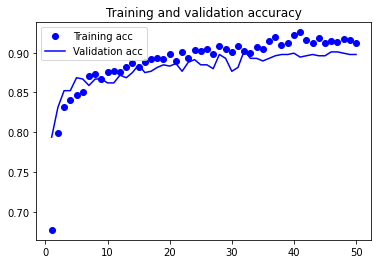

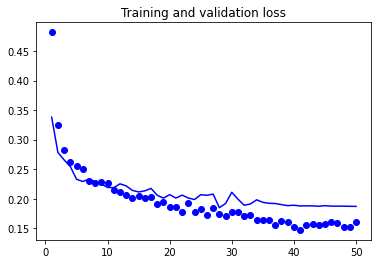

In [37]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.savefig('accuracy.png')
plt.show()

In [38]:
from tensorflow.keras.models import load_model

model_vgg19.save('model_vgg19.h5')

In [39]:
test_model = load_model('model_vgg19.h5')

<ipython-input-40-9fff1a42e9c6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_1 = test_model.predict_generator(generator=valid_batches, steps=len(valid_batches), verbose=0)


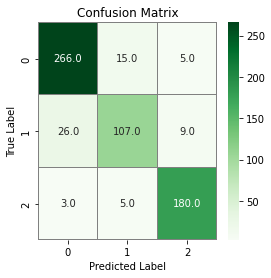

<Figure size 432x288 with 0 Axes>

In [40]:
predictions_1 = test_model.predict_generator(generator=valid_batches, steps=len(valid_batches), verbose=0)

pred_label = np.argmax(predictions_1,axis=1)
classes = np.argmax(predictions_1, axis=1)
cm = confusion_matrix(valid_batches.labels,pred_label)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix.png')

In [41]:
predictions = test_model.predict_generator(valid_batches, steps=1, verbose=0)

<ipython-input-41-556bd177d548>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = test_model.predict_generator(valid_batches, steps=1, verbose=0)


In [42]:
rounded_prediction = np.argmax(predictions, axis=-1)
for i in rounded_prediction:
    print(i)

0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
2
0
1
0
0
0
0
0
0
0
0
0
0
0


In [43]:
test_imgs, test_labels = next(valid_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [44]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [45]:
cm = confusion_matrix(y_true=valid_batches.labels, y_pred=pred_label)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_true=valid_batches.labels, y_pred=pred_label))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       286
           1       0.84      0.75      0.80       142
           2       0.93      0.96      0.94       188

    accuracy                           0.90       616
   macro avg       0.89      0.88      0.88       616
weighted avg       0.90      0.90      0.90       616



Confusion matrix, without normalization
[[266  15   5]
 [ 26 107   9]
 [  3   5 180]]


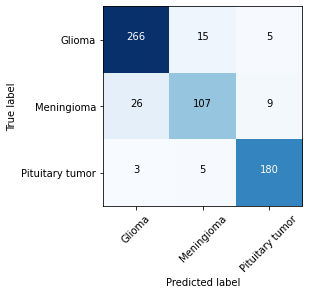

In [46]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Glioma','Meningioma', 'Pituitary tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [48]:
y_score = model_vgg19.predict_generator(valid_batches)


<ipython-input-48-7d1a0c8cb1d2>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_score = model_vgg19.predict_generator(valid_batches)


In [49]:
classes = dict((v, k) for k, v in valid_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(valid_batches)

In [50]:

from keras.utils.np_utils import to_categorical

In [51]:
y_true_categorical = valid_batches.classes
y_true = (to_categorical(y_true_categorical, num_classes = num_classes))


<ipython-input-53-ad3396a1dc6d>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


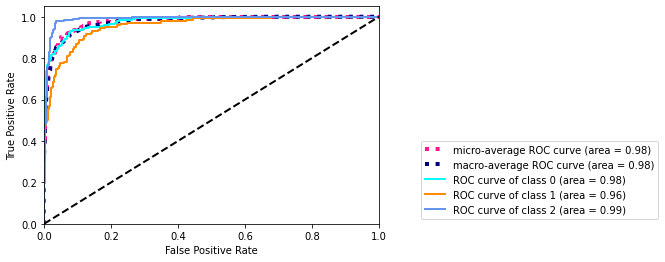

In [53]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#plt.title('Receiver operating characteristic (ROC) to Multi-Class Validation Set (' + model_name + ')')
plt.legend(bbox_to_anchor=(1.85,0), loc="lower right")
#plt.savefig(model_path + '0_results/Model' + '_' + model_name + '_' + str(epochs) + '_epochs_ROC_Validation.png', dpi=600, bbox_inches="tight")
plt.show()



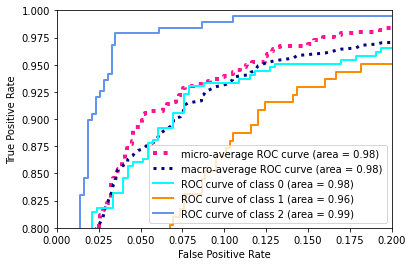

In [54]:

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=3)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
classes = dict((v, k) for k, v in test_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(test_batches)

In [ ]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [ ]:
def plot_roc_curve(y_test, y_pred):
     n_classes = len(np.unique(y_test))
     y_test = label_binarize(y_test, classes=np.arange(n_classes))

     # Compute ROC curve and ROC area for each class
     fpr = dict()
     tpr = dict()
     roc_auc = dict()
     thresholds = dict()
     for i in range(n_classes):
       fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
     roc_auc[i] = auc(fpr[i], tpr[i])

     # Compute micro-average ROC curve and ROC area
     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

     # First aggregate all false positive rates
     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

     # Then interpolate all ROC curves at this points
     mean_tpr = np.zeros_like(all_fpr)
     for i in range(n_classes):
       mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
     mean_tpr /= n_classes

     fpr["macro"] = all_fpr
     tpr["macro"] = mean_tpr
     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
     #plt.figure(figsize=(10,5))
     plt.figure(dpi=600)
     lw = 2
     plt.plot(fpr["micro"], tpr["micro"],
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
     color="deeppink", linestyle=":", linewidth=4,)

     plt.plot(fpr["macro"], tpr["macro"],
     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
     color="navy", linestyle=":", linewidth=4,)

     colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
     for i, color in zip(range(n_classes), colors):
       plt.plot(fpr[i], tpr[i], color=color, lw=lw,
       label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

     plt.plot([0, 1], [0, 1], "k--", lw=lw)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.title("Receiver Operating Characteristic (ROC) curve")
     plt.legend()

In [ ]:
test_model = load_model('model_vgg16.h5')

In [ ]:
plot_roc_curve(test_batches,  predictions )